In [9]:
import pandas as pd
import sys 
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.extend(['../../'])

from analysis.utils import read_stat_history_date, read_stat_history_dates_combined, combine_result

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10,7)})
sns.set_context()
sns.set_palette("tab10")

In [4]:
USER = 25
SPAWN_RATE = 1
RUNTIME = "31s"
DATE = "2022-03-05T12:44:39"
TEST_TYPE = "visualization"

In [5]:
system_dfs_combined = read_stat_history_dates_combined(TEST_TYPE, USER, SPAWN_RATE, RUNTIME, "median")

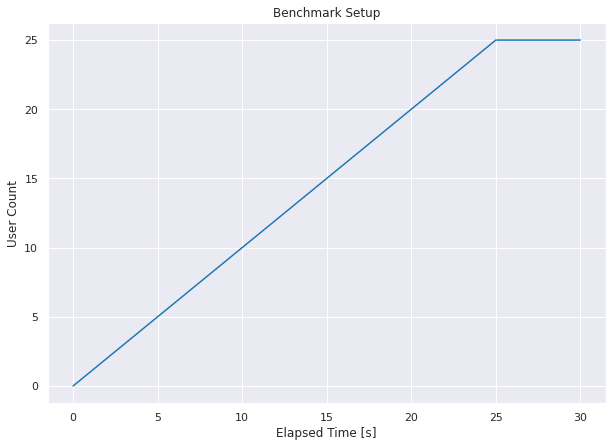

In [6]:
rastless_df = system_dfs_combined["rastless"]
ax = sns.lineplot(data=rastless_df, x=rastless_df.index, y="User Count")
ax.set_title('Benchmark Setup')
plt.savefig("./result_images/user_count.pdf")

In [10]:
df_median_response = combine_result(system_dfs_combined, "Total Median Response Time")

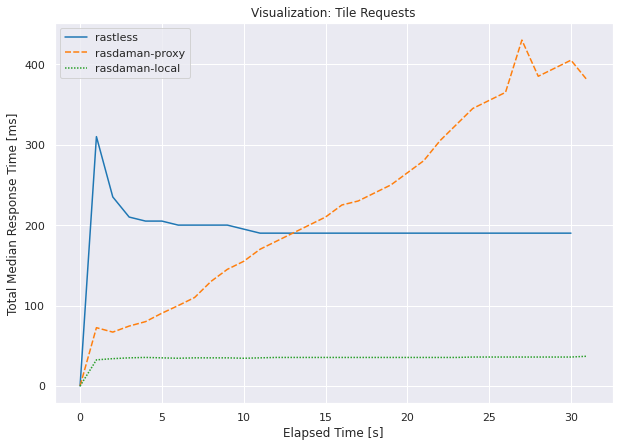

In [11]:
ax = sns.lineplot(data=df_median_response)
ax.set(ylabel='Total Median Response Time [ms]')
ax.set_title('Visualization: Tile Requests')
plt.savefig("./result_images/total_median_response_time.pdf")

In [13]:
df_median_response = combine_result(system_dfs_combined, "Total Average Response Time")

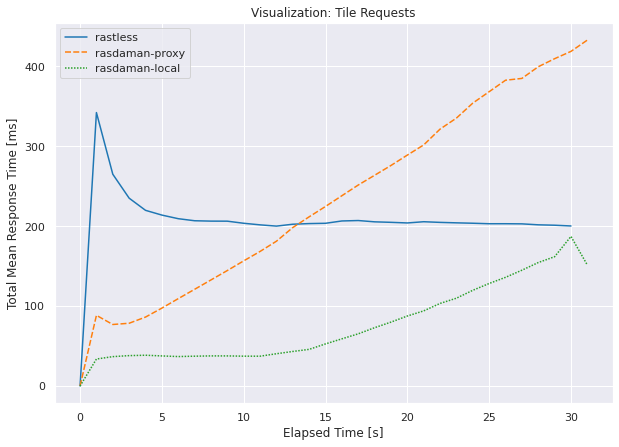

In [14]:
ax = sns.lineplot(data=df_median_response)
ax.set(ylabel='Total Mean Response Time [ms]')
ax.set_title('Visualization: Tile Requests')
plt.savefig("./result_images/total_mean_response_time.pdf")

In [15]:
df_request_s = combine_result(system_dfs_combined, "Requests/s")

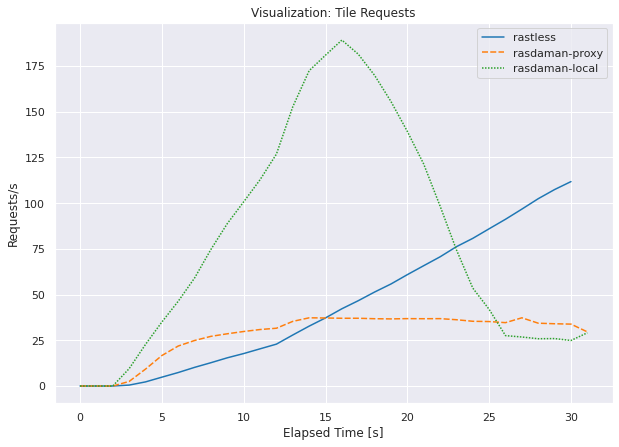

In [16]:
ax = sns.lineplot(data=df_request_s)
ax.set(ylabel='Requests/s')
ax.set_title('Visualization: Tile Requests')
plt.savefig("./result_images/visualization/requests_per_second.pdf")

In [17]:
df_request_total_count = combine_result(system_dfs_combined, "Total Request Count")

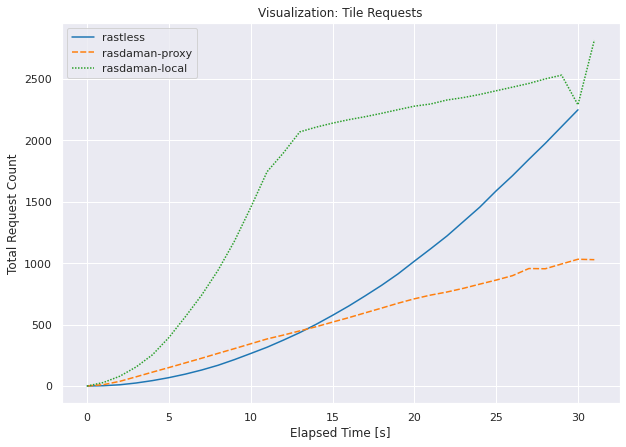

In [19]:
ax = sns.lineplot(data=df_request_total_count)
ax.set(ylabel="Total Request Count")
ax.set_title('Visualization: Tile Requests')
plt.savefig("./result_images/total_request_count.pdf")